Date: Feb. 5, 2017
By: Ford Fowler

## About the Data:

Describes student enrollment and student demographics of each school in New York City.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('School_Demographics_and_Accountability_Snapshot_2006-2012.csv', sep=',')
df = df.replace('.', np.nan)

In [3]:
df

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
7,01M019,P.S. 019 ASHER LEVY,20052006,61.5,NaN,402,15,43,55,53,...,103,25.6,207,51.5,39,9.7,214.0,53.2,188.0,46.8
8,01M019,P.S. 019 ASHER LEVY,20062007,61.5,NaN,312,13,37,45,52,...,70,22.4,172,55.1,19,6.1,157.0,50.3,155.0,49.7
9,01M019,P.S. 019 ASHER LEVY,20072008,61.5,NaN,338,28,48,46,47,...,72,21.3,186,55.0,22,6.5,162.0,47.9,176.0,52.1


In [4]:
list(df.columns)

['DBN',
 'Name',
 'schoolyear',
 'fl_percent',
 'frl_percent',
 'total_enrollment',
 'prek',
 'k',
 'grade1',
 'grade2',
 'grade3',
 'grade4',
 'grade5',
 'grade6',
 'grade7',
 'grade8',
 'grade9',
 'grade10',
 'grade11',
 'grade12',
 'ell_num',
 'ell_percent',
 'sped_num',
 'sped_percent',
 'ctt_num',
 'selfcontained_num',
 'asian_num',
 'asian_per',
 'black_num',
 'black_per',
 'hispanic_num',
 'hispanic_per',
 'white_num',
 'white_per',
 'male_num',
 'male_per',
 'female_num',
 'female_per']

## Questions about the data:

1. Who tends to be the most segregated?
2. What is THE most segregated school?
3. How does race correlate with decrease in enrollment 9-12?
4. How does amount of ELL's(English language learners) correlate with decrease in enrollment 9-12?
5. How does segregation/diversity correlate with decrease in enrollment 9-12?

### Finding most segregated racial group

In [5]:
np.std(df['asian_per'])

16.547835794340156

In [6]:
np.std(df['black_per'])

28.472636201154813

In [7]:
np.std(df['hispanic_per'])

25.74446534227253

In [8]:
np.std(df['white_per'])

19.331235192394047

If I'm interpreting this correctly, then Black students are the most segregated racial group, meaning they are often a small percentage of the school or a relatively large percentage of the school. Asian students are the least commonly segregated.

### Finding the most segregated school

In [9]:
df['segr'] = df[['asian_per', 'black_per', 'hispanic_per', 'white_per']].std(axis=1)
segregated = df[df.segr == max(df.segr)]
len(segregated)

32

In [10]:
segregated = segregated[segregated.total_enrollment > 10]
len(segregated)

18

Turns out there are 32 completely segregated schools, however only 18 have more than 10 enrolled students.

In [11]:
segregated = segregated[segregated.total_enrollment > 10]
len(segregated[segregated.hispanic_per == 100.0])

18

18 out of 18 are completely hispanic.

## Decrease in Enrollment from 9th to 12th and any correlations

In [12]:
high_schools = df[[column for column in df.columns[16:]]]
high_schools = high_schools.replace('    ', np.NaN).dropna()

DISCLAIMER: There are a lot of potential reasons for a decrease in enrollment from 9th to 12th grades, not only students dropping out. But I need something to work with.

In [13]:
high_schools['grade_diff'] = pd.to_numeric(high_schools.grade9) - pd.to_numeric(high_schools.grade12)
high_schools

,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,...,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,segr,grade_diff
94,109,82,67,56,52.0,10.1,124.0,24.1,16,35,...,272,52.8,12,2.3,281.0,54.6,234.0,45.4,22.484865,53
95,97,85,60,53,50.0,10.6,118.0,25.1,20,33,...,264,56.2,14,3.0,264.0,56.2,206.0,43.8,23.813931,44
96,109,89,87,55,81.0,15.9,112.0,21.9,24,34,...,290,56.8,16,3.1,297.0,58.1,214.0,41.9,23.911835,54
97,107,85,67,69,97.0,21.7,106.0,23.7,27,33,...,255,56.9,9,2.0,267.0,59.6,181.0,40.4,23.891473,38
98,98,79,80,50,94.0,22.3,105.0,24.9,34,35,...,227,53.8,7,1.7,259.0,61.4,163.0,38.6,22.432491,48
152,219,118,91,50,37.0,7.7,75.0,15.7,18,7,...,217,45.4,21,4.4,247.0,51.7,231.0,48.3,17.450310,169
153,215,146,95,77,36.0,6.8,83.0,15.6,30,6,...,252,47.3,22,4.1,258.0,48.4,275.0,51.6,18.076227,138
154,244,178,91,75,42.0,7.1,112.0,19.0,46,7,...,278,47.3,26,4.4,300.0,51.0,288.0,49.0,17.775076,169
155,209,196,99,82,39.0,6.7,127.0,21.7,63,2,...,280,47.8,25,4.3,307.0,52.4,279.0,47.6,18.042242,127
156,177,158,129,68,28.0,5.3,123.0,23.1,78,2,...,247,46.4,25,4.7,286.0,53.8,246.0,46.2,17.510473,109


### Is there a correlation between segregation and decrease in high school enrollment?

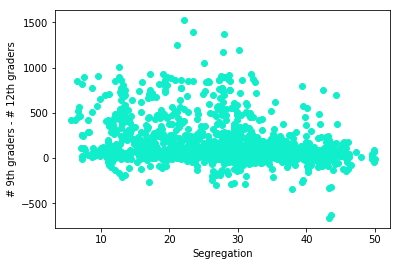

In [14]:
y = high_schools['grade_diff']
x = high_schools['segr']
plt.ylabel('# 9th graders - # 12th graders')
plt.xlabel('Segregation')
plt.scatter(x, y, color='#11EECC')
plt.show()

Nope, doesn't appear so.
### Is there a correlation between decrease in enrollment and race?

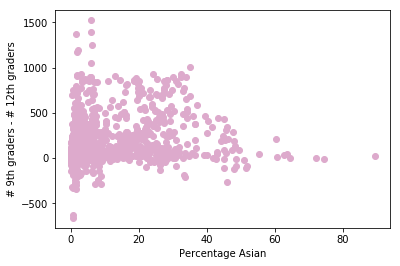

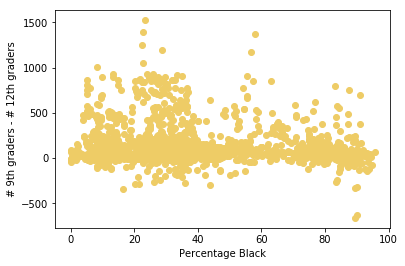

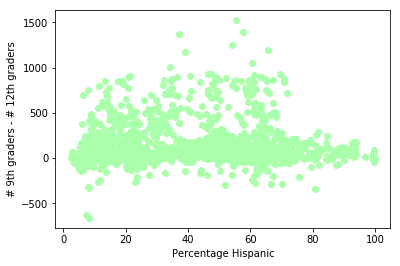

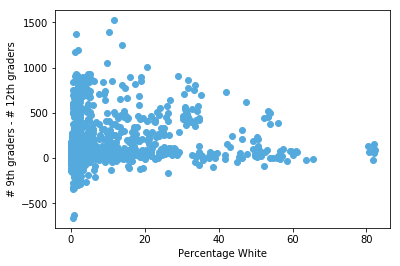

In [15]:
t = high_schools['grade_diff']
s1 = high_schools['asian_per']
s2 = high_schools['black_per']
s3 = high_schools['hispanic_per']
s4 = high_schools['white_per']

plt.ylabel('# 9th graders - # 12th graders')
plt.xlabel('Percentage Asian')
plt.scatter(s1, t, color='#DDAACC')
plt.show()

plt.ylabel('# 9th graders - # 12th graders')
plt.xlabel('Percentage Black')
plt.scatter(s2, t, color='#EECC66')
plt.show()

plt.ylabel('# 9th graders - # 12th graders')
plt.xlabel('Percentage Hispanic')
plt.scatter(s3, t, color='#AAFFAA')
plt.show()

plt.ylabel('# 9th graders - # 12th graders')
plt.xlabel('Percentage White')
plt.scatter(s4, t, color='#55AADD')
plt.show()

Nothing obvious here, it does seem that with higher percentages of White and Asian students, there is a decrease in  enrollment drop. With Black and Hispanic students, it's a bit more chaotic.

### Is there a correlation between number of English language learners and enrollment?

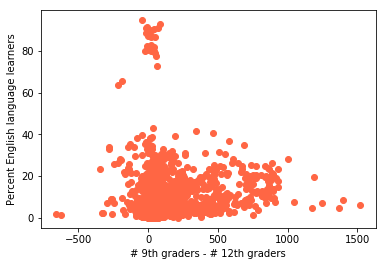

In [16]:
x = high_schools['grade_diff']
y = high_schools['ell_percent']
plt.xlabel('# 9th graders - # 12th graders')
plt.ylabel('Percent English language learners')
plt.scatter(x, y, color='#FF6644')
plt.show()

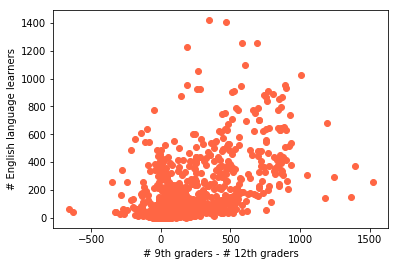

In [17]:
x = high_schools['grade_diff']
y = high_schools['ell_num']
plt.xlabel('# 9th graders - # 12th graders')
plt.ylabel('# English language learners')
plt.scatter(x, y, color='#FF6644')
plt.show()

Is it better to use percentage of ELL's or total number for this comparison? There appears to be a slight correlation between more ELL's and higher decline in enrollment from 9th to 12 grade. But I am very uncertain.